# Illegal Mines Correlation

We are using a smaller data set that only contains few relevant features: income, lighting, deforestation, health and distance to the nearest large-scale mine.
Also the data in the above features is aggregated by year and latitude/longitude.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [2]:
# Dataset location
maindb = "short.csv"

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(maindb, low_memory=False, sep=',')
df.head()


,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
0,98.0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820
1,98.0,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570
2,98.0,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813
3,98.0,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780
4,98.0,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992


In [3]:
df.shape

(1593, 10)

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
year,1.000000,-0.041613,0.140556,0.282040,0.210935,-0.279912,-0.345842,0.268879,-0.012088,0.122306
x,-0.041613,1.000000,-0.044612,0.044417,-0.032909,0.028370,-0.405654,-0.140034,0.130309,0.234926
y,0.140556,-0.044612,1.000000,-0.299556,-0.121485,-0.140273,0.349652,-0.301155,-0.314759,0.877439
expenditure,0.282040,0.044417,-0.299556,1.000000,0.556490,-0.058995,-0.496576,0.254737,0.526546,-0.238783
income,0.210935,-0.032909,-0.121485,0.556490,1.000000,-0.102473,-0.273329,0.221765,0.248368,-0.119854
ill_or_injured,-0.279912,0.028370,-0.140273,-0.058995,-0.102473,1.000000,0.148217,-0.096269,-0.105714,-0.135924
malaria,-0.345842,-0.405654,0.349652,-0.496576,-0.273329,0.148217,1.000000,-0.130625,-0.583006,0.246476
forestloss,0.268879,-0.140034,-0.301155,0.254737,0.221765,-0.096269,-0.130625,1.000000,0.039231,-0.311557
nightlights,-0.012088,0.130309,-0.314759,0.526546,0.248368,-0.105714,-0.583006,0.039231,1.000000,-0.218054
distance_nearestlargemine,0.122306,0.234926,0.877439,-0.238783,-0.119854,-0.135924,0.246476,-0.311557,-0.218054,1.000000


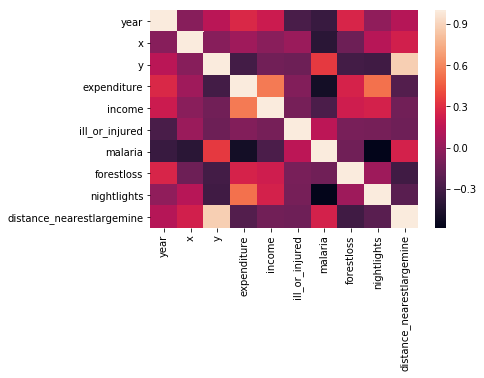

In [4]:
#Correlation Matrix
corrdf = df.corr()
corr = (corrdf)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [5]:
df.columns

Index(['year', 'x', 'y', 'expenditure', 'income', 'ill_or_injured', 'malaria',
       'forestloss', 'nightlights', 'distance_nearestlargemine'],
      dtype='object')

In [6]:
df.isnull().any()

year                          True
x                            False
y                            False
expenditure                   True
income                        True
ill_or_injured                True
malaria                       True
forestloss                    True
nightlights                   True
distance_nearestlargemine    False
dtype: bool

In [7]:
print(df[df["year"].isnull()])
#df.head()

      year        x        y  expenditure  income  ill_or_injured  malaria  \
1590   NaN  0.57982  7.83256          NaN     NaN             NaN      NaN   
1591   NaN  0.63470  6.02610          NaN     NaN             NaN      NaN   
1592   NaN  0.70544  5.84189          NaN     NaN             NaN      NaN   

      forestloss  nightlights  distance_nearestlargemine  
1590         NaN          NaN                 185603.190  
1591         NaN          NaN                  86881.336  
1592         NaN          NaN                 102678.480  


Since these three rows do not contain any economic and health data that we want to combine with small scale mining we drop these rows.

In [8]:
print(df.shape)
df2 = df.drop(df["year"].isnull())
print(df2.shape)

(1593, 10)
(1591, 10)


In [9]:
print(df2[df2["year"].isnull()])

      year        x        y  expenditure  income  ill_or_injured  malaria  \
1590   NaN  0.57982  7.83256          NaN     NaN             NaN      NaN   
1591   NaN  0.63470  6.02610          NaN     NaN             NaN      NaN   
1592   NaN  0.70544  5.84189          NaN     NaN             NaN      NaN   

      forestloss  nightlights  distance_nearestlargemine  
1590         NaN          NaN                 185603.190  
1591         NaN          NaN                  86881.336  
1592         NaN          NaN                 102678.480  


In [10]:
df2.isnull().any()

year                          True
x                            False
y                            False
expenditure                   True
income                        True
ill_or_injured                True
malaria                       True
forestloss                    True
nightlights                   True
distance_nearestlargemine    False
dtype: bool

In [11]:
df2.describe()

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
count,1588.000000,1591.000000,1591.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1591.000000
mean,1687.406801,-1.111399,7.387716,1145.132634,1619.906667,0.192833,0.414509,0.003695,5.446806,104794.179750
std,716.309251,1.031762,1.895317,864.213000,2777.778647,0.121386,0.117128,0.006239,11.400687,99632.327518
min,98.000000,-3.203450,4.761240,80.285172,-35.787189,0.000000,0.091799,0.000000,0.000000,676.799930
25%,2005.000000,-1.896610,5.940526,547.354915,350.794030,0.100758,0.348766,0.000037,0.046671,26914.290500
50%,2012.000000,-1.012910,6.701314,907.444430,720.887420,0.171080,0.422086,0.000899,0.856756,63795.102000
75%,2013.000000,-0.264739,8.780352,1475.033300,1883.936525,0.266832,0.501627,0.004510,3.601662,175508.375000
max,2013.000000,1.192945,11.127133,7677.353500,61162.129000,0.628571,0.683214,0.072279,60.936462,369073.840000


Showing Illness and Malaria over time

In [12]:
pip install plotly


The following command must be run outside of the IPython shell:

    $ pip install plotly

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [15]:
df2 = (df["year"] < 2000) + 1900

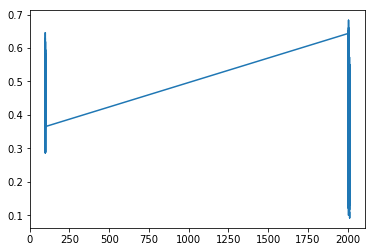

In [14]:
plt.plot(df["year"], df["malaria"], '-')

In [16]:
df2.head()

0    1901
1    1901
2    1901
3    1901
4    1901
Name: year, dtype: int32

In [18]:
print(df2["year"])

KeyError: 'year'